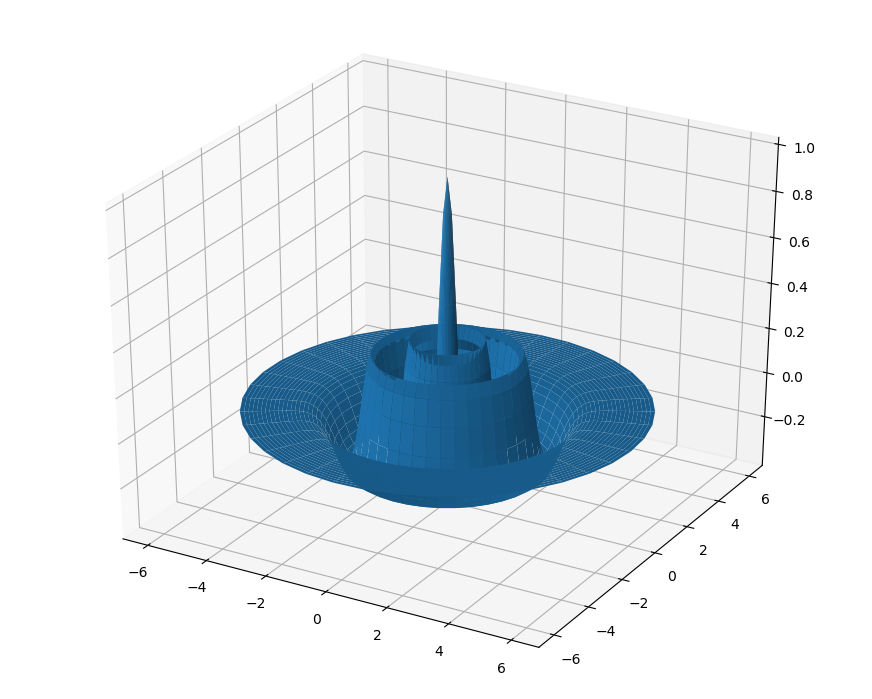

In [16]:
import numpy as np
from scipy.special import binom as binom 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import pyplot
plt = pyplot
from matplotlib import cm
import matplotlib

'''Define A_(pm)  (Gauss-laguerre polinomials) '''

def Ln(p,m,xj):
    Ln=0.
    for i in range(p+1):#el p+1 es por la indexacion
        Ln=Ln+((-1)**i)*binom(p+m,p-i)*(xj**i)/np.math.factorial(i)
    return Ln

def A(p, m, r, phi):#defino G-L

    A0=np.zeros((len(phi),len(r)))
    for j, rn in enumerate(r):
            A0[:,j]=np.exp(-rn**2)*Ln(p,0,2*rn**2)

    A1=np.zeros_like(A0)
    for j, rn in enumerate(r):
         for k, phin in enumerate(phi):
            A1[k,j]=2*((2*rn**2)**(m/2))*np.sqrt(np.math.factorial(p)/np.math.factorial(p+m))*np.exp(-rn**2)*Ln(p,m,2*(rn**2))*np.sin(m*phin)

    A2=np.zeros_like(A0)

    for j, rn in enumerate(r):
        for k, phin in enumerate(phi):
            A2[k,j]=2*(2*rn**2)**(m/2)*np.sqrt(np.math.factorial(p)/np.math.factorial(p+m))*np.exp(-rn**2)*Ln(p,m,2*rn**2)*np.cos(m*phin)


    return A0, A1, A2

pi=np.pi
r=np.linspace(0,6,50)
phi=np.linspace(0,2*pi,40)

A0, A1, A2=A(5,1,r,phi)#

fig = pyplot.figure(figsize=(11,9), dpi=100)
ax = pyplot.subplot(111, projection='3d')
R, P = np.meshgrid(r, phi)
X, Y = R*np.cos(P), R*np.sin(P)
ax.plot_surface(X, Y, A0)


Otra prueba

In [ ]:
def cilindricas(listax,listay):
    res_x = []
    res_y = []
    r = []
    phi = []
    
    for a in range(0, len(listax)):
        res_x.append(math.pow(listax[a],2))
    
    for b in range(0, len(listay)):
        res_y.append(math.pow(listay[b],2))
        
    for c in range(0, len(listax)):
        r.append(np.sqrt(res_x[c]+res_y[c]))
    
    for d in range(0, len(listax)):
        phi.append(math.atan(listay[d]/listax[d]))
    
    return r, phi

Otra prueba

In [ ]:
def guardar3DPlotROI2(FITS_dirPath, picosEnROI, sunCenter, pixRadius, prop):
    #Se obtienen las direcciones de los archivos FITS a gráficar
    fitsPaths= sorted(glob(str(FITS_dirPath)+'/*193.image_lev1.fits'))
    print (len(fitsPaths))
    
     # Se itera sobre cada archivo FITS del directorio
    for i in range(0, len(fitsPaths)):
        # Se crea objeto Map y se obtiene el centro(sunC) y radio(radiusSun) 
        # del disco solar de los metadatos 
        aiamapFITS_i = sunpy.map.Map(fitsPaths[i])
        propRadius = int(prop * pixRadius)    
        x = np.arange(aiamapFITS_i.data.shape[0])
        y = np.arange(aiamapFITS_i.data.shape[1])
        
        def cilindricas(listax,listay):
            res_x = []
            res_y = []
            r = []
            phi = []
    
            for a in range(0, len(listax)):
                res_x.append(math.pow(listax[a],2))
    
            for b in range(0, len(listay)):
                res_y.append(math.pow(listay[b],2))
        
            for c in range(0, len(listax)):
                r.append(np.sqrt(res_x[c]+res_y[c]))
    
            for d in range(0, len(listax)):
                phi.append(math.atan(listay[d]/listax[d]))
    
                return r, phi
    
        r, phi = cilindricas(x,y)
        R, Phi = np.meshgrid(r[int(sunCenter[0]-propRadius): int(sunCenter[0]+propRadius)], phi[int(sunCenter[1]-propRadius): int(sunCenter[1]+propRadius)])
        
    time_obs = str(aiamapFITS_i.meta['date-obs'])
    if('.84' in time_obs):  
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(R, Phi, aiamapFITS_i.data[int(sunCenter[0]-propRadius): int(sunCenter[0]+propRadius), int(sunCenter[1]-propRadius): int(sunCenter[1]+propRadius)])
            

Otra prueba

AttributeError: 'list' object has no attribute 'ndim'

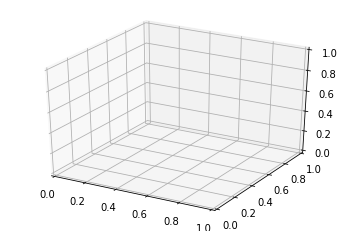

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


R = 2
u = np.linspace(0,  2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = R * np.outer(np.cos(u), np.sin(v))
y = R * np.outer(np.sin(u), np.sin(v))
z = R * np.meshgrid(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z)
fig.show()

In [1]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x,z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()

<Figure size 640x480 with 1 Axes>

Otra prueba

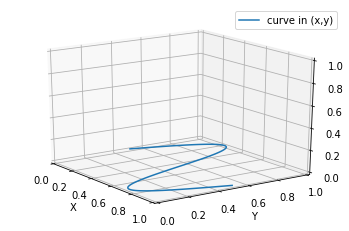

In [2]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()

Otra prueba

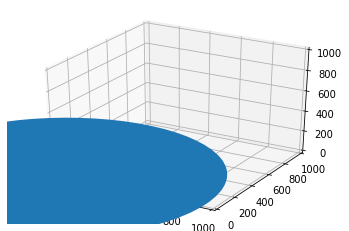

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import mpl_toolkits.mplot3d.art3d as art3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw a circle on the x=0 'wall'
p = Circle((5, 5), 944)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")

ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)
ax.set_zlim(0, 1000)

plt.show()